In [1]:
import torch as pt
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline
pt.manual_seed(1);

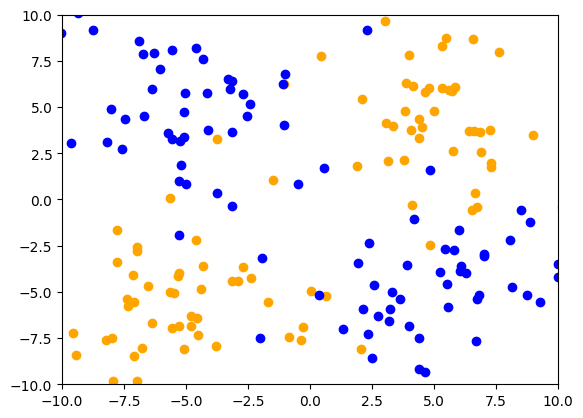

In [2]:
NUM = 100

#X spam data points

#lower left
Xs1 = pt.normal(0, 3, [NUM // 2, 2]) - 5
#upper right
Xs2 = pt.normal(0, 3, [NUM // 2, 2]) + 5

#100 spam data points
Xs = pt.cat([Xs1, Xs2])


#X not spam data points
#upper left
Xns1 = pt.normal(0, 3, [NUM // 2, 2]) + 5
Xns1[:, 1] = Xns1[:, 1] - 10

#lower right
Xns2 = pt.normal(0, 3, [NUM // 2, 2]) - 5
Xns2[:, 1] = Xns2[:, 1] + 10

#100 not spam data points
Xns = pt.cat([Xns1, Xns2])

#200 data points, 100 spam, 100 not spam
X = pt.cat([Xs, Xns])

plt.scatter(X[:NUM, 0], X[:NUM, 1], color = 'orange');

plt.scatter(X[NUM:, 0], X[NUM:, 1], color = 'blue');

plt.xlim([-10, 10])
plt.ylim([-10, 10]);

In [3]:
# #spam = 1, not spam = 0
y = pt.cat( ( pt.ones(NUM).to(int), pt.zeros(NUM).to(int)), dim = 0 )
y

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
model = nn.Sequential(
  nn.Linear(2, 3),
  nn.ReLU(),
  nn.Linear(3, 2),
  nn.ReLU(),
  nn.LogSoftmax(dim = 1)
)

def forward(X):
  return model(X)

def loss(y_pred, y):
  return pt.nn.functional.nll_loss(y_pred, y)

def metric(y_pred, y):  # -> accuracy
  return (1 / len(y)) * ((y_pred.argmax(dim = 1) == y).sum())

y_pred = model(X)
# loss(y_pred, y), metric(y_pred, y)



In [5]:
y_pred.argmax(dim=1)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0])

In [6]:
y

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
optimizer = pt.optim.AdamW(model.parameters())

In [ ]:
for i in range(10000):
  y_pred = forward(X)
  xe = loss(y_pred, y)
  accuracy = metric(y_pred, y)
  xe.backward()
  if i % 100 == 0:
    print("Loss: ", xe, " Accuracy ", accuracy.data.item())#, " Grads ", model.parameters())

  optimizer.step()
  optimizer.zero_grad()

Loss:  tensor(0.8056, grad_fn=<NllLossBackward0>)  Accuracy  0.4599999785423279
Loss:  tensor(0.6238, grad_fn=<NllLossBackward0>)  Accuracy  0.550000011920929
Loss:  tensor(0.5173, grad_fn=<NllLossBackward0>)  Accuracy  0.8349999785423279
Loss:  tensor(0.4546, grad_fn=<NllLossBackward0>)  Accuracy  0.824999988079071
Loss:  tensor(0.4149, grad_fn=<NllLossBackward0>)  Accuracy  0.8399999737739563
Loss:  tensor(0.3847, grad_fn=<NllLossBackward0>)  Accuracy  0.8449999690055847
Loss:  tensor(0.3635, grad_fn=<NllLossBackward0>)  Accuracy  0.8499999642372131
Loss:  tensor(0.3477, grad_fn=<NllLossBackward0>)  Accuracy  0.8549999594688416
Loss:  tensor(0.3336, grad_fn=<NllLossBackward0>)  Accuracy  0.85999995470047
Loss:  tensor(0.3208, grad_fn=<NllLossBackward0>)  Accuracy  0.8650000095367432
Loss:  tensor(0.3097, grad_fn=<NllLossBackward0>)  Accuracy  0.8799999952316284
Loss:  tensor(0.3015, grad_fn=<NllLossBackward0>)  Accuracy  0.8849999904632568
Loss:  tensor(0.2940, grad_fn=<NllLossBackwa

In [ ]:
import numpy as np
x_min, x_max, y_min, y_max, step = -15., 15, -15., 15., 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                    np.arange(y_min, y_max, step))

Xg = np.hstack( (xx.ravel()[:, None], yy.ravel()[:, None]) )


X_test = pt.from_numpy(Xg).to(pt.float)
y_test = forward(X_test).argmax(dim = 1).detach().numpy()

Z = -1 * y_test.reshape(xx.shape)

fig = plt.figure()
plt.axis("equal")
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.4);
plt.scatter(X[:NUM, 0], X[:NUM, 1], color = 'orange');
plt.scatter(X[NUM:, 0], X[NUM:, 1]);